In [39]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
train_df = pd.read_csv('../dataset/train.csv')
test_df = pd.read_csv('../dataset/test.csv')
data = pd.concat([train_df, test_df])

In [41]:
data = data.drop(data.iloc[:, [0,1]], axis=1)
data.dropna(inplace=True)

In [42]:
data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1190.210662,2.728544,3.057349,2.756786,2.976909,3.204685,3.252720,3.441589,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222,14.643385,15.091129
std,15.117597,997.560954,1.329235,1.526787,1.401662,1.278506,1.329905,1.350651,1.319168,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624,37.932867,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [43]:
def calculate_outliers_percentage(df):

    # Calculate the interquartile range (IQR) for each column
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Calculate the number of outliers in each column
    num_outliers = ((df < lower_bound) | (df > upper_bound)).sum()

    # Calculate the percentage of outliers in each column
    pct_outliers = round(num_outliers / len(df) * 100 , 4)

    return pct_outliers



In [44]:
outliers = pd.DataFrame(calculate_outliers_percentage(data.select_dtypes(include=[np.number])), columns=['% Outliers'])
outliers.index.name = 'Column Name'
outliers.reset_index(inplace=True)
print(outliers)

                          Column Name  % Outliers
0                                 Age      0.0000
1                     Flight Distance      2.1987
2               Inflight wifi service      0.0000
3   Departure/Arrival time convenient      0.0000
4              Ease of Online booking      0.0000
5                       Gate location      0.0000
6                      Food and drink      0.0000
7                     Online boarding      0.0000
8                        Seat comfort      0.0000
9              Inflight entertainment      0.0000
10                   On-board service      0.0000
11                   Leg room service      0.0000
12                   Baggage handling      0.0000
13                    Checkin service     12.4020
14                   Inflight service      0.0000
15                        Cleanliness      0.0000
16         Departure Delay in Minutes     13.8778
17           Arrival Delay in Minutes     13.5087


In [45]:
data.select_dtypes(include=[np.number])[["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]].describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1190.210662,14.643385,15.091129
std,15.117597,997.560954,37.932867,38.465650
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,844.000000,0.000000,0.000000
75%,51.000000,1744.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


In [46]:
# data = data.loc[(data['Departure Delay in Minutes'] <= 1100) & (data['Arrival Delay in Minutes'] <= 1100)]

/var/folders/2s/q86v619s3_g1crpyjj20lc9m0000gn/T/ipykernel_51114/2577149293.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x='Departure Delay in Minutes', y='Arrival Delay in Minutes',


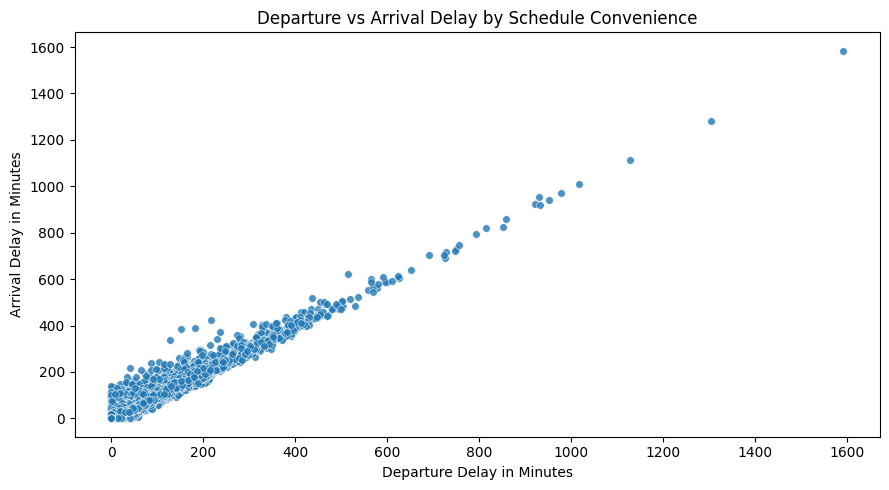

In [47]:
plt.figure(figsize=(9, 5))
sns.scatterplot(data=data, x='Departure Delay in Minutes', y='Arrival Delay in Minutes',
                 palette='magma', alpha=0.8, s=30)
plt.title('Departure vs Arrival Delay by Schedule Convenience')
plt.tight_layout()
plt.show()

In [48]:
mean_flight_distance = data['Flight Distance'].mean()
data["Flight_Distance_distance_from_mean"] = data["Flight Distance"] - mean_flight_distance
data["Flight_Distance_VARIANCE"] = np.square(data["Flight_Distance_distance_from_mean"])
flight_variance = data["Flight_Distance_VARIANCE"].sum() / data["Flight_Distance_VARIANCE"].count()
flight_standard_deviation = np.sqrt(flight_variance)
data["Flight_Distance_standardized"] = (data["Flight Distance"] - mean_flight_distance) / flight_standard_deviation

print("Flight data set results")
print("===============================")
print("Flight Distance")
print("Mean: ", round(mean_flight_distance, 2))
print("Variance: ", round(flight_variance, 2))
print("Standard deviation: ", round(flight_standard_deviation, 2))
print("===============================")

Flight data set results
Flight Distance
Mean:  1190.21
Variance:  995120.17
Standard deviation:  997.56


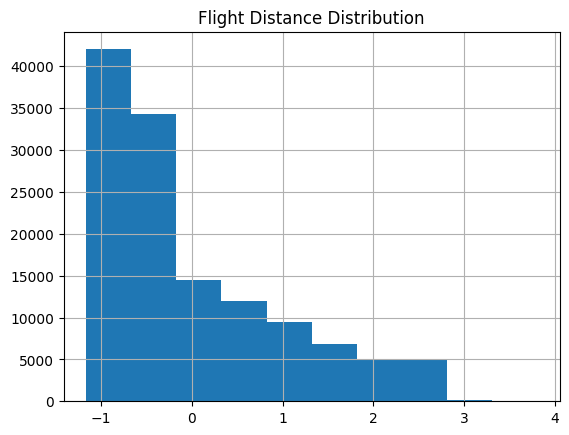

In [49]:
data.hist(column="Flight_Distance_standardized")
plt.title("Flight Distance Distribution")
plt.show()

In [50]:
mean_age = data['Age'].mean()
data["Age_distance_from_mean"] = data["Age"] - mean_age
data["Age_VARIANCE"] = np.square(data["Age_distance_from_mean"])
age_variance = data["Age_VARIANCE"].sum() / data["Age_VARIANCE"].count()
age_standard_deviation = np.sqrt(age_variance)
data["Age_standardized"] = (data["Age"] - mean_age) / age_standard_deviation

print("Flight data set results")
print("===============================")
print("Age")
print("Mean: ", round(mean_age, 2))
print("Variance: ", round(age_variance, 2))
print("Standard deviation: ", round(age_standard_deviation, 2))
print("===============================")

Flight data set results
Age
Mean:  39.43
Variance:  228.54
Standard deviation:  15.12


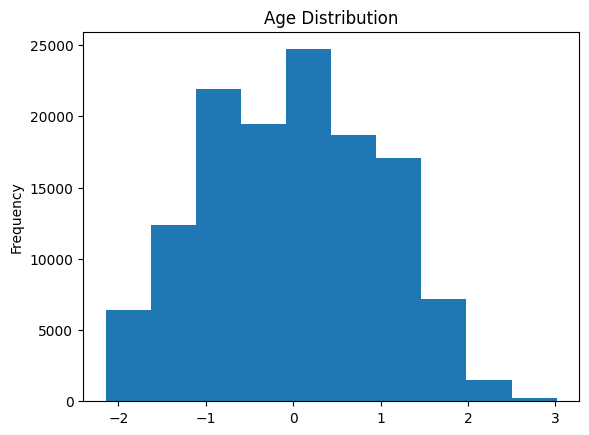

In [51]:
data["Age_standardized"].plot(kind='hist')

plt.title("Age Distribution")
plt.show()

In [52]:
mean_departure = data['Departure Delay in Minutes'].mean()
data["Departure_Delay_in_Minutes_from_mean"] = data["Departure Delay in Minutes"] - mean_departure
data["Departure_Delay_in_Minutes_VARIANCE"] = np.square(data["Departure_Delay_in_Minutes_from_mean"])
departure_variance = data["Departure_Delay_in_Minutes_VARIANCE"].sum() / data["Departure_Delay_in_Minutes_VARIANCE"].count()
departure_standard_deviation = np.sqrt(departure_variance)
data["Departure_Delay_in_Minutes_standardized"] = (data["Departure Delay in Minutes"] - mean_departure) / departure_standard_deviation
print("Flight data set results")
print("===============================")
print("Departure Delay in Minutes")
print("Mean: ", round(mean_age, 2))
print("Variance: ", round(age_variance, 2))
print("Standard deviation: ", round(age_standard_deviation, 2))
print("===============================")

Flight data set results
Departure Delay in Minutes
Mean:  39.43
Variance:  228.54
Standard deviation:  15.12


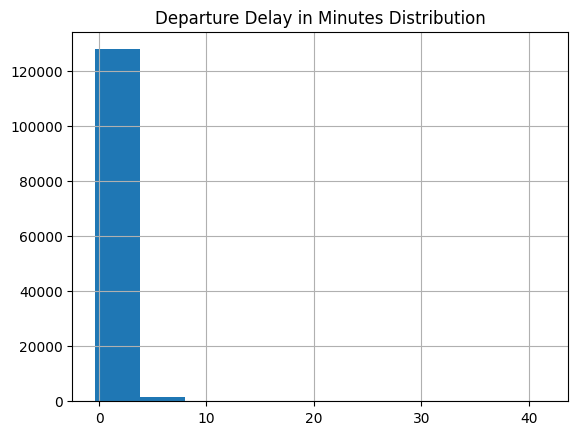

In [53]:
data.hist(column="Departure_Delay_in_Minutes_standardized")
plt.title("Departure Delay in Minutes Distribution")
plt.show()